In [1]:
# импорт библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

%matplotlib inline
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
housing = fetch_california_housing()


# 8 Деревья решений

In [350]:
# print(fetch_california_housing().DESCR)

## Анализ массива

### загрузка данных

In [2]:
target = pd.DataFrame(pd.Series(housing.target), columns=housing.target_names)
features = pd.DataFrame(housing.data, columns=housing.feature_names)
features.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


### проверка наличия пропусков в массиве

In [353]:
for col in features.columns:
    if features[col].isnull().sum():
        raise print(f"из None column {col}", features[col].isnull().sum())

## Линейная регрессия

In [354]:
class LinearRegressionAnalyzer:
    
    def __init__(self):
        self.results = {}  # Список для хранения результатов каждой манипуляции
        self.reg = LinearRegression()

    def train_and_plot_linear_regression_with_hist_and_corr(self, count, X, y, manipulate_info, columns_name):
        self.train_and_plot_linear_regression(count, X, y, manipulate_info, columns_name)
        
        # Создаем сетку из двух графиков рядом
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        
        # Выводим гистограмму целевой переменной на первом графике
        axes[0].hist(self.y, bins=30, color='blue', alpha=0.7)
        axes[0].set_xlabel('Значения целевой переменной')
        axes[0].set_ylabel('Частота')
        axes[0].set_title(f'{self._manipulate_info}\nРаспределение целевой переменной')
        
        # Выводим корреляционную матрицу на втором графике с аннотациями
        correlation_matrix = self.X.corr()
        sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, ax=axes[1])
        axes[1].set_title('Корреляционная матрица')
        
        plt.tight_layout()  # Для избежания наложения графиков
        plt.show()

    def train_and_plot_linear_regression(self, count, X, y, manipulate_info, columns_name):
        self.X, self.y = X, y
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)
        self.reg.fit(X_train, y_train)
        y_pred = self.reg.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
        r2_test = r2_score(y_test, y_pred)

        y_pred = self.reg.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred))
        r2_train = r2_score(y_train, y_pred)
        self._manipulate_info = manipulate_info
        self.columns_name = columns_name
        result = {
            "Модель": "Линейная Регрессия",
            "RMSE_test": round(rmse_test, 3),
            "R2_test": round(r2_test, 3),
            "RMSE_train": round(rmse_train, 3),
            "R2_train": round(r2_train, 3),
            "Тип преобразования": self._manipulate_info,
            "Поля": self.columns_name,
        }
        
        self.results.update({count: result})

    def get_results(self):
        return self.results

analyze_reg = LinearRegressionAnalyzer()


In [355]:
corr = features.corr()
corr.style.background_gradient(cmap='RdYlGn')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


### оценка корреляции переменных
1. ✅ `MedInc (Медианный доход) `vs. `AveRooms (Среднее количество комнат)`: средняя положительная корреляция `(0.326)`. Это может означать, что районы с более высоким медианным доходом имеют склонность к более большому среднему количеству комнат. Важна для обучения
2. ❌ `AveRooms (Среднее количество комнат)` vs. `AveBedrms (Среднее количество спален)`: положительная корреляция `(0.847)`. вероятно количество комнат и спален в доме обычно тесно связаны. Можно удалить одну
3. ✅ `HouseAge (Средний возраст домов)` vs. Population (Население): отрицательная корреляция `(-0.296)`. Наверное более старые районы имеют меньшее население. Важная для обучения
4. ❌ `Latitude (Широта)` vs. `Longitude (Долгота)`: сильная отрицательная корреляция `(-0.92)`. Это координаты и один признак можно удалить. Можно удалить
5. В целом, остальные корреляции являются слабыми и несильно влияют на другие признаки.

In [356]:
# выводим список с корреляциями
def get_correlation_thresholds(correlation_matrix, threshold):
    num_features = len(correlation_matrix.columns)
    high_correlation = set()
    low_correlation = set()

    # Заполняем множества наибольших и наименьших корреляций
    for i in range(num_features):
        for j in range(i+1, num_features):
            column1 = correlation_matrix.columns[i]
            column2 = correlation_matrix.columns[j]
            correlation_value = correlation_matrix.iloc[i, j]
            
            if abs(correlation_value) >= threshold:
                high_correlation.add((column1, column2, correlation_value))
            elif abs(correlation_value) <= threshold:
                low_correlation.add((column1, column2, correlation_value))

    # Сортировка списков по абсолютному значению корреляции
    high_corr = sorted(high_correlation, key=lambda x: abs(x[2]), reverse=True)
    low_corr = sorted(low_correlation, key=lambda x: abs(x[2]))

    return high_corr, low_corr

correlation_matrix = features.corr()
high_corr, low_corr = get_correlation_thresholds(correlation_matrix, threshold=0.7)

print("Наивысшие корреляции:")
for item in high_corr:
    print(f"{item[0]} и {item[1]}: {item[2]:.2f}")

print("\nНаименьшие корреляции:")
for item in low_corr:
    print(f"{item[0]} и {item[1]}: {item[2]:.2f}")

Наивысшие корреляции:
Latitude и Longitude: -0.92
AveRooms и AveBedrms: 0.85

Наименьшие корреляции:
AveOccup и Latitude: 0.00
AveOccup и Longitude: 0.00
MedInc и Population: 0.00
AveRooms и AveOccup: -0.00
AveBedrms и AveOccup: -0.01
HouseAge и Latitude: 0.01
HouseAge и AveOccup: 0.01
AveBedrms и Longitude: 0.01
MedInc и Longitude: -0.02
MedInc и AveOccup: 0.02
AveRooms и Longitude: -0.03
MedInc и AveBedrms: -0.06
AveBedrms и Population: -0.07
AveBedrms и Latitude: 0.07
Population и AveOccup: 0.07
AveRooms и Population: -0.07
HouseAge и AveBedrms: -0.08
MedInc и Latitude: -0.08
Population и Longitude: 0.10
AveRooms и Latitude: 0.11
HouseAge и Longitude: -0.11
Population и Latitude: -0.11
MedInc и HouseAge: -0.12
HouseAge и AveRooms: -0.15
HouseAge и Population: -0.30
MedInc и AveRooms: 0.33


###  обучение и анализ данных

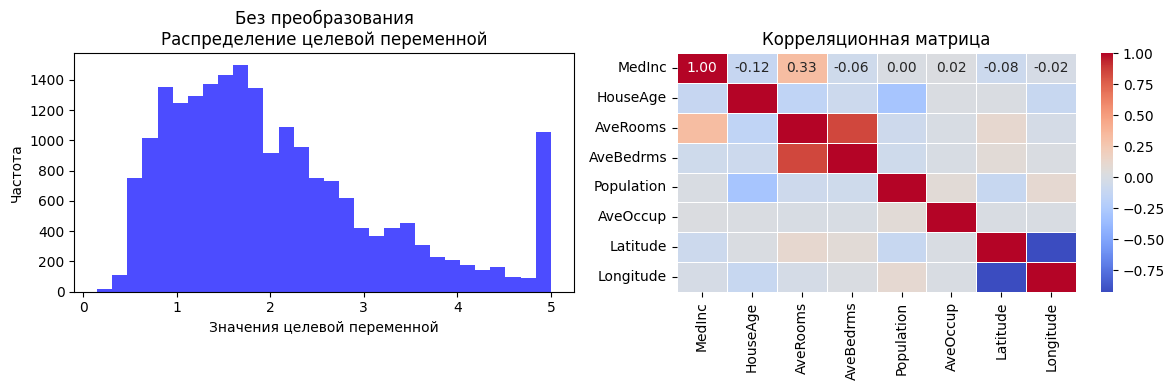

,R2_test,R2_train,RMSE_test,RMSE_train,Модель,Поля,Тип преобразования
1,0.576,0.613,0.746,0.72,Линейная Регрессия,-,Без преобразования


In [357]:
analyze_reg.train_and_plot_linear_regression_with_hist_and_corr(1, features, target, "Без преобразования", "-")
pd.DataFrame(analyze_reg.get_results()).T

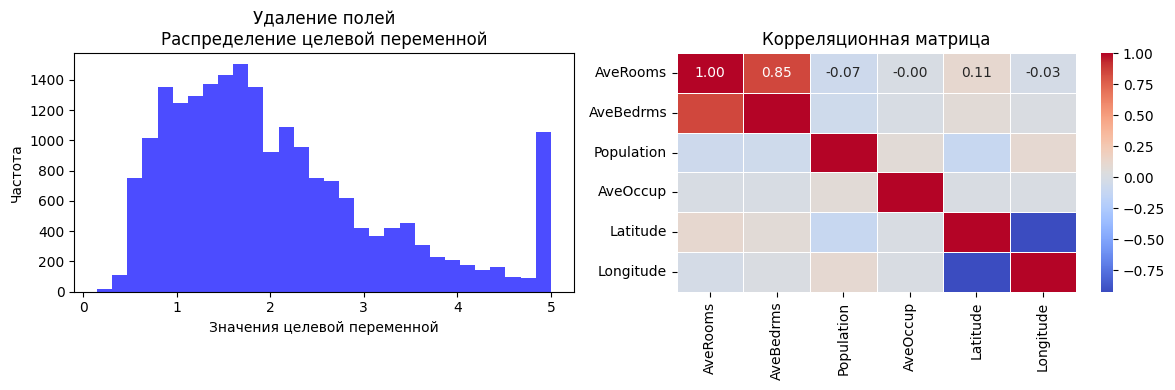

,Модель,RMSE_test,R2_test,RMSE_train,R2_train,Тип преобразования,Поля
1,Линейная Регрессия,0.746,0.576,0.72,0.613,Без преобразования,-
2,Линейная Регрессия,0.884,0.403,0.899,0.396,Удаление полей,"'HouseAge', 'MedInc'"


In [358]:
analyze_reg.train_and_plot_linear_regression_with_hist_and_corr(2, features.drop(['HouseAge', 'MedInc'], axis=1), target, "Удаление полей", "'HouseAge', 'MedInc'")
pd.DataFrame(analyze_reg.get_results()).T

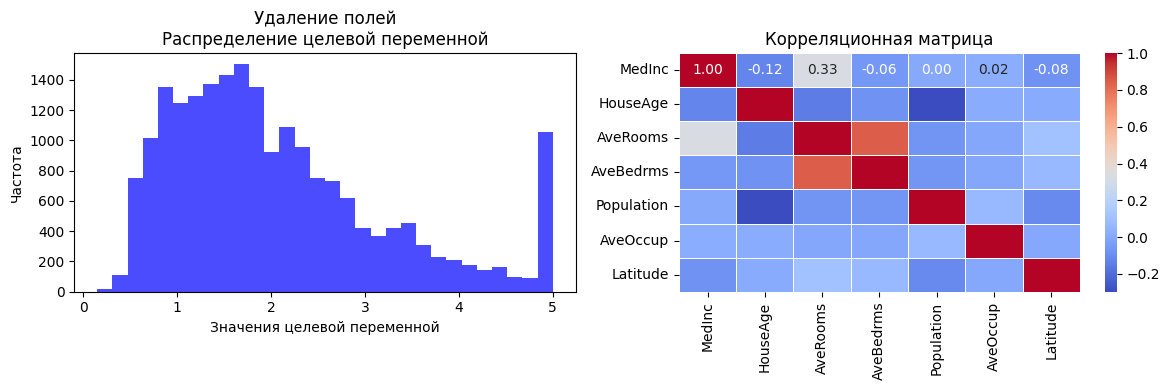

,Модель,RMSE_test,R2_test,RMSE_train,R2_train,Тип преобразования,Поля
1,Линейная Регрессия,0.746,0.576,0.72,0.613,Без преобразования,-
2,Линейная Регрессия,0.884,0.403,0.899,0.396,Удаление полей,"'HouseAge', 'MedInc'"
3,Линейная Регрессия,0.798,0.514,0.777,0.549,Удаление полей,'Longitude'


In [359]:
analyze_reg.train_and_plot_linear_regression_with_hist_and_corr(3, features.drop(['Longitude'], axis=1), target, "Удаление полей", "'Longitude'")
pd.DataFrame(analyze_reg.get_results()).T

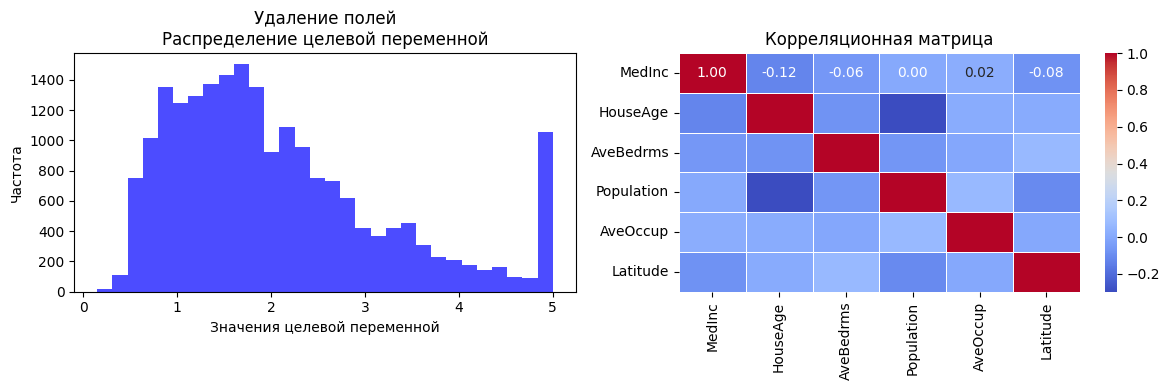

,Модель,RMSE_test,R2_test,RMSE_train,R2_train,Тип преобразования,Поля
1,Линейная Регрессия,0.746,0.576,0.72,0.613,Без преобразования,-
2,Линейная Регрессия,0.884,0.403,0.899,0.396,Удаление полей,"'HouseAge', 'MedInc'"
3,Линейная Регрессия,0.798,0.514,0.777,0.549,Удаление полей,'Longitude'
4,Линейная Регрессия,0.807,0.503,0.798,0.524,Удаление полей,'AveRooms' 'Longitude'


In [360]:
analyze_reg.train_and_plot_linear_regression_with_hist_and_corr(4, features.drop(['AveRooms', 'Longitude'], axis=1), target, "Удаление полей", "'AveRooms' 'Longitude'")
pd.DataFrame(analyze_reg.get_results()).T

 Удаление признаков 'AveRooms' 'Longitude' показывает лучшие показатели на тестовой выборке

Метод межквартального размаха (IQR):

In [361]:
def remove_outliers_iqr(df_features, df_target, column):
    Q1 = df_features[column].quantile(0.25)
    Q3 = df_features[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_cleaned_features = df_features[(df_features[column] >= lower_bound) & (df_features[column] <= upper_bound)]
    df_cleaned_target = df_target[(df_features[column] >= lower_bound) & (df_features[column] <= upper_bound)]
    return df_cleaned_features, df_cleaned_target

features_IQR = features.copy()
target_IQR = target.copy()

for column in features_IQR.columns:
    features_IQR, target_IQR = remove_outliers_iqr(features_IQR, target_IQR, column)

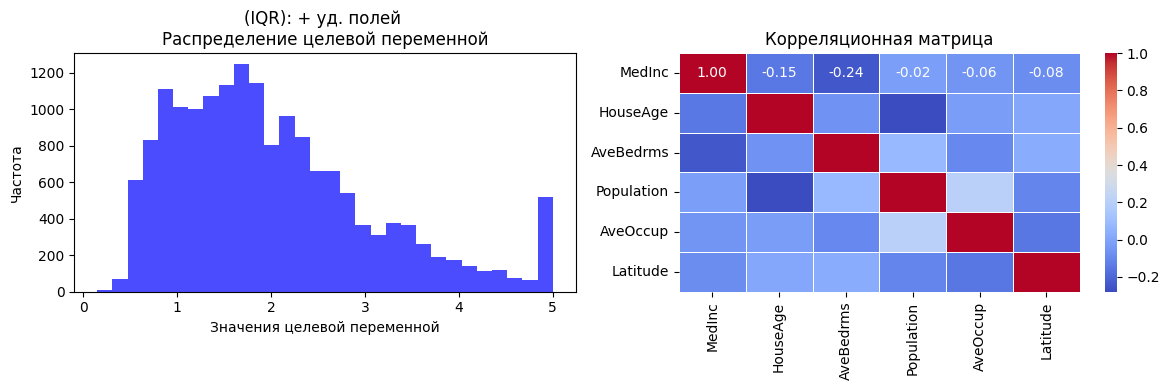

,Модель,RMSE_test,R2_test,RMSE_train,R2_train,Тип преобразования,Поля
1,Линейная Регрессия,0.746,0.576,0.72,0.613,Без преобразования,-
2,Линейная Регрессия,0.884,0.403,0.899,0.396,Удаление полей,"'HouseAge', 'MedInc'"
3,Линейная Регрессия,0.798,0.514,0.777,0.549,Удаление полей,'Longitude'
4,Линейная Регрессия,0.807,0.503,0.798,0.524,Удаление полей,'AveRooms' 'Longitude'
5,Линейная Регрессия,0.701,0.579,0.713,0.554,(IQR): + уд. полей,"'AveRooms', 'Longitude"


In [362]:
analyze_reg.train_and_plot_linear_regression_with_hist_and_corr(5, features_IQR.drop(['AveRooms', 'Longitude'], axis=1), target_IQR, "(IQR): + уд. полей ", "'AveRooms', 'Longitude")
pd.DataFrame(analyze_reg.get_results()).T

Метод Z-оценки:

In [363]:
from scipy import stats

def remove_outliers_zscore(df_features, df_target, z_threshold=3):
    z_scores = np.abs(stats.zscore(df_features))
    mask_no_outliers = (z_scores < z_threshold).all(axis=1)
    df_features_cleaned = df_features[mask_no_outliers]
    df_target_cleaned = df_target[mask_no_outliers]
    return df_features_cleaned, df_target_cleaned

features_Z = features.copy()
target_Z = target.copy()

features_Z, target_Z = remove_outliers_zscore(features_Z, target_Z)

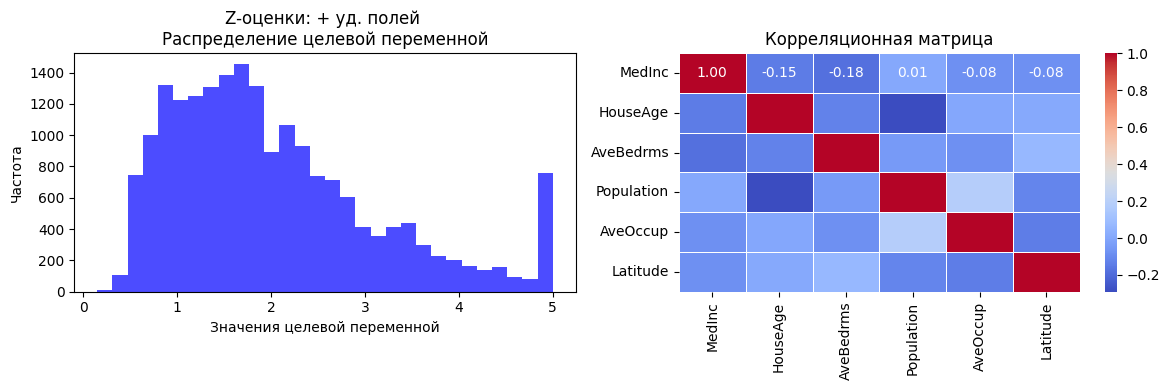

,Модель,RMSE_test,R2_test,RMSE_train,R2_train,Тип преобразования,Поля
1,Линейная Регрессия,0.746,0.576,0.72,0.613,Без преобразования,-
2,Линейная Регрессия,0.884,0.403,0.899,0.396,Удаление полей,"'HouseAge', 'MedInc'"
3,Линейная Регрессия,0.798,0.514,0.777,0.549,Удаление полей,'Longitude'
4,Линейная Регрессия,0.807,0.503,0.798,0.524,Удаление полей,'AveRooms' 'Longitude'
5,Линейная Регрессия,0.701,0.579,0.713,0.554,(IQR): + уд. полей,"'AveRooms', 'Longitude"
6,Линейная Регрессия,0.759,0.532,0.75,0.54,Z-оценки: + уд. полей,"'AveRooms', 'Longitude"


In [364]:
analyze_reg.train_and_plot_linear_regression_with_hist_and_corr(6, features_Z.drop(['AveRooms', 'Longitude'], axis=1), target_Z, "Z-оценки: + уд. полей ", "'AveRooms', 'Longitude")
pd.DataFrame(analyze_reg.get_results()).T

In [365]:
features_Z['LogMedInc'] = np.log(features_Z['MedInc'])
features_Z['AveRoomsSquared'] = features_Z['AveRooms'] ** 2
features_Z['SqrtAveBedrms'] = np.sqrt(features_Z['AveBedrms'])

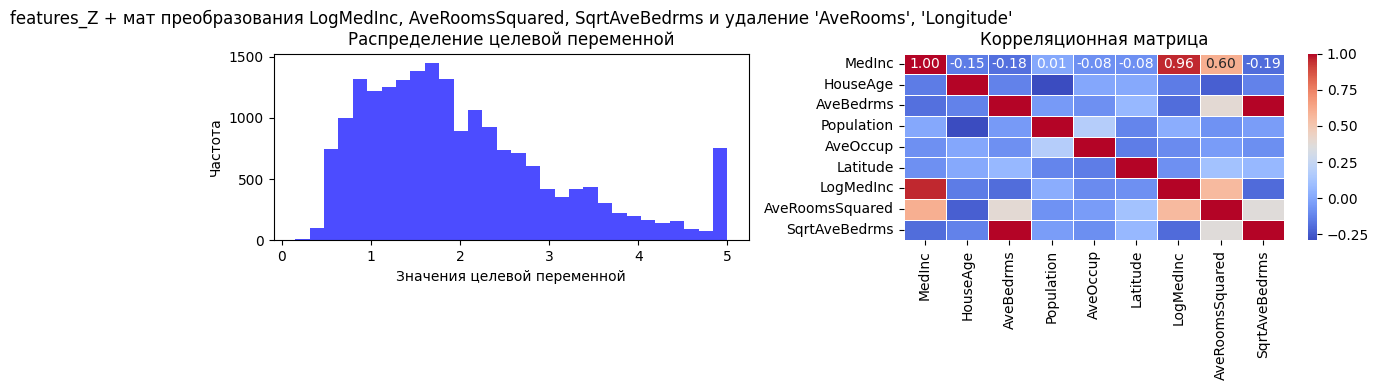

,Модель,RMSE_test,R2_test,RMSE_train,R2_train,Тип преобразования,Поля
1,Линейная Регрессия,0.746,0.576,0.72,0.613,Без преобразования,-
2,Линейная Регрессия,0.884,0.403,0.899,0.396,Удаление полей,"'HouseAge', 'MedInc'"
3,Линейная Регрессия,0.798,0.514,0.777,0.549,Удаление полей,'Longitude'
4,Линейная Регрессия,0.807,0.503,0.798,0.524,Удаление полей,'AveRooms' 'Longitude'
5,Линейная Регрессия,0.701,0.579,0.713,0.554,(IQR): + уд. полей,"'AveRooms', 'Longitude"
6,Линейная Регрессия,0.759,0.532,0.75,0.54,Z-оценки: + уд. полей,"'AveRooms', 'Longitude"
7,Линейная Регрессия,0.732,0.565,0.72,0.577,"features_Z + мат преобразования LogMedInc, Ave...",'MedInc' 'AveRooms' 'AveBedrms'


In [366]:
analyze_reg.train_and_plot_linear_regression_with_hist_and_corr(7, features_Z.drop(['AveRooms', 'Longitude'], axis=1), target_Z,  "features_Z + мат преобразования LogMedInc, AveRoomsSquared, SqrtAveBedrms и удаление 'AveRooms', 'Longitude'", "'MedInc' 'AveRooms' 'AveBedrms'")
pd.DataFrame(analyze_reg.get_results()).T

### кластеризация данных

In [367]:
from sklearn.cluster import KMeans

numpy_features = features.copy()
kmeans = KMeans(n_clusters=25)
coordinates = numpy_features[['Latitude', 'Longitude']]
numpy_features['Cluster'] = kmeans.fit_predict(coordinates)

d:\avsip\code\ML\home_work_netology\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


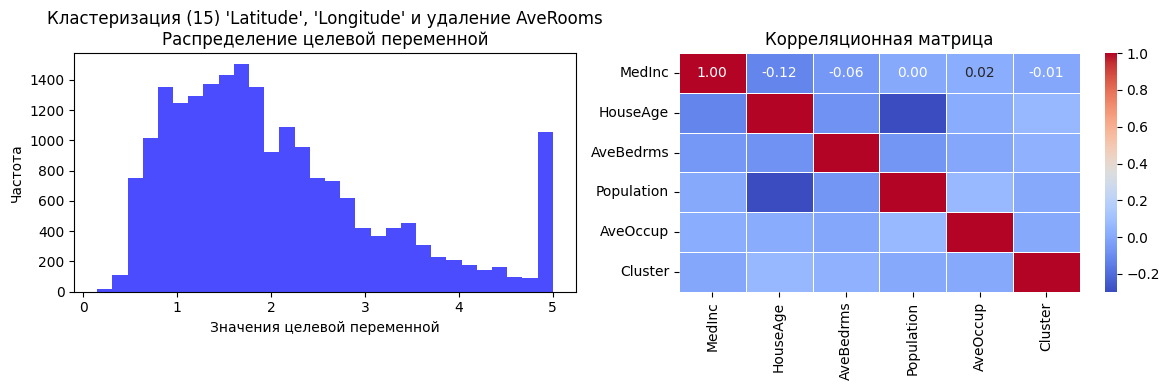

,Модель,RMSE_test,R2_test,RMSE_train,R2_train,Тип преобразования,Поля
1,Линейная Регрессия,0.746,0.576,0.72,0.613,Без преобразования,-
2,Линейная Регрессия,0.884,0.403,0.899,0.396,Удаление полей,"'HouseAge', 'MedInc'"
3,Линейная Регрессия,0.798,0.514,0.777,0.549,Удаление полей,'Longitude'
4,Линейная Регрессия,0.807,0.503,0.798,0.524,Удаление полей,'AveRooms' 'Longitude'
5,Линейная Регрессия,0.701,0.579,0.713,0.554,(IQR): + уд. полей,"'AveRooms', 'Longitude"
6,Линейная Регрессия,0.759,0.532,0.75,0.54,Z-оценки: + уд. полей,"'AveRooms', 'Longitude"
7,Линейная Регрессия,0.732,0.565,0.72,0.577,"features_Z + мат преобразования LogMedInc, Ave...",'MedInc' 'AveRooms' 'AveBedrms'
8,Линейная Регрессия,0.812,0.496,0.804,0.516,"Кластеризация (15) 'Latitude', 'Longitude' и у...","AveRooms 'Latitude', 'Longitude'"


In [368]:
analyze_reg.train_and_plot_linear_regression_with_hist_and_corr(8, numpy_features.drop(['AveRooms', 'Latitude', 'Longitude'], axis=1), target,  "Кластеризация (15) 'Latitude', 'Longitude' и удаление AveRooms", "AveRooms 'Latitude', 'Longitude'")
pd.DataFrame(analyze_reg.get_results()).T

### Вывод

1. На данном наборе данных хорошо проявили себя следующие методы повышения качества модели 
    + `Модель №8`, использующая кластеризацию данных по координатам 'Latitude' и 'Longitude', показала высокий результат но ухудшение метрик `RMSE` и `R2` как на тестовой, так и на тренировочной выборках.
    + `Модель №6` и `Модель №6`, и методы удаления полей на основе корреляции и статистических выбросов `Z-оценки)`, улучшая `RMSE` и `R2` на тестовой выборке.
    + Особенно эффективными оказались удаление полей `'HouseAge'`, `'MedInc'`, `'Longitude'`, `'AveRooms'` и `'Longitude'`, что привело к улучшению метрик на тестовой выборке.